In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [42]:
df = pd.read_csv(r"C:\Users\Cirrolytix\Documents\Python Bootcamp\Seasonal_exercise.csv")

In [44]:
df.dtypes

year         int64
quarter      int64
sales      float64
dtype: object

In [45]:
df = df[df.year < 2012]

In [50]:
df.reset_index().index

RangeIndex(start=0, stop=48, step=1)

In [51]:
df["d1"] = df.reset_index().index

C:\Users\Cirrolytix\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [53]:
quarter_df = pd.get_dummies(df["quarter"], prefix = "q")
df = df.join(quarter_df)

In [54]:
df

,year,quarter,sales,d1,q_1,q_2,q_3,q_4
0,2000,1,842436.10,0,1,0,0,0
1,2000,2,874667.64,1,0,1,0,0
2,2000,3,889136.52,2,0,0,1,0
3,2000,4,974474.00,3,0,0,0,1
4,2001,1,863258.73,4,1,0,0,0
5,2001,2,900955.70,5,0,1,0,0
6,2001,3,913039.00,6,0,0,1,0
7,2001,4,1007086.24,7,0,0,0,1
8,2002,1,890692.96,8,1,0,0,0
9,2002,2,936708.90,9,0,1,0,0


In [55]:
pred1 = df[["d1", "q_2", "q_3", "q_4"]]

In [57]:
pred1

,d1,q_2,q_3,q_4
0,0,0,0,0
1,1,1,0,0
2,2,0,1,0
3,3,0,0,1
4,4,0,0,0
5,5,1,0,0
6,6,0,1,0
7,7,0,0,1
8,8,0,0,0
9,9,1,0,0


In [58]:
lm.fit(pred1, df.sales)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [59]:
lm.score(pred1, df.sales)

0.9866770858474372

In [61]:
import matplotlib as plt

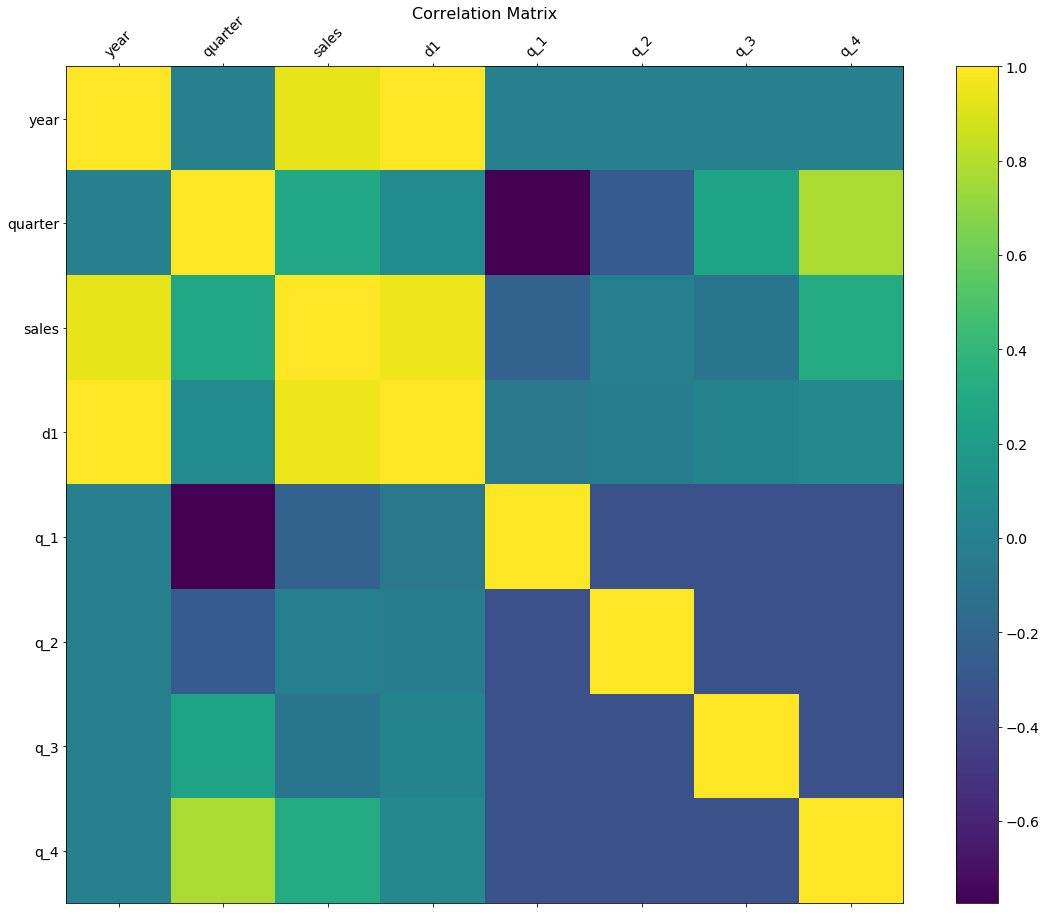

In [67]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [71]:
lm.fit(pred1, df.sales)
lm.predict(pred1)

array([ 783600.55376603,  855962.92293269,  830689.59126603,
        967882.70459936,  838461.84686917,  910824.21603584,
        885550.88436917, 1022743.99770251,  893323.13997232,
        965685.50913899,  940412.17747232, 1077605.29080565,
        948184.43307547, 1020546.80224213,  995273.47057547,
       1132466.5839088 , 1003045.72617861, 1075408.09534528,
       1050134.76367861, 1187327.87701195, 1057907.01928176,
       1130269.38844843, 1104996.05678176, 1242189.17011509,
       1112768.31238491, 1185130.68155157, 1159857.34988491,
       1297050.46321824, 1167629.60548805, 1239991.97465472,
       1214718.64298805, 1351911.75632139, 1222490.8985912 ,
       1294853.26775787, 1269579.9360912 , 1406773.04942453,
       1277352.19169435, 1349714.56086101, 1324441.22919435,
       1461634.34252768, 1332213.48479749, 1404575.85396416,
       1379302.52229749, 1516495.63563083, 1387074.77790064,
       1459437.14706731, 1434163.81540064, 1571356.92873397])

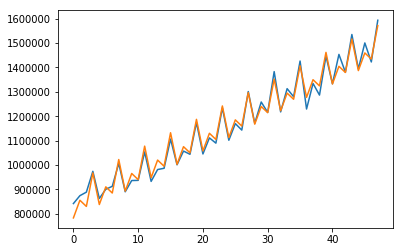

In [72]:
prediction = pd.DataFrame(lm.predict(pred1))
prediction.columns = ['pred_y']
output = df.join(prediction, how='inner')
plt.plot(output.index, output["sales"])
plt.plot(output.index, output["pred_y"])